In [1]:
# import brainbox
from utils import download_glm_hmm, save_data_path
from one.api import ONE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
# pd.set_option('display.max_colwidth', None)

In [2]:
# ONE base_url = https://openalyx.internationalbrainlab.org
# ALYX_LOGIN USER = intbrainlab
# FlatIron Password = international

# from one.api import ONE
# ONE.setup(base_url='https://openalyx.internationalbrainlab.org', make_default=True)

In [3]:
one = ONE(password='international')

In [4]:
ephys_eid = [
    'db4df448-e449-4a6f-a0e7-288711e7a75a',  # Berkeley
    'd23a44ef-1402-4ed7-97f5-47e9a7a504d9',  # Berkeley
    '4a45c8ba-db6f-4f11-9403-56e06a33dfa4',  # Berkeley
    'e535fb62-e245-4a48-b119-88ce62a6fe67',  # Berkeley
    '54238fd6-d2d0-4408-b1a9-d19d24fd29ce',  # Berkeley
    'b03fbc44-3d8e-4a6c-8a50-5ea3498568e0',  # Berkeley
    '30c4e2ab-dffc-499d-aae4-e51d6b3218c2',  # CCU
    'd0ea3148-948d-4817-94f8-dcaf2342bbbe',  # CCU
    'a4a74102-2af5-45dc-9e41-ef7f5aed88be',  # CCU
    '746d1902-fa59-4cab-b0aa-013be36060d5',  # CCU
    '88224abb-5746-431f-9c17-17d7ef806e6a',  # CCU
    '0802ced5-33a3-405e-8336-b65ebc5cb07c',  # CCU
    'ee40aece-cffd-4edb-a4b6-155f158c666a',  # CCU
    'c7248e09-8c0d-40f2-9eb4-700a8973d8c8',  # CCU
    '72cb5550-43b4-4ef0-add5-e4adfdfb5e02',  # CCU
    'dda5fc59-f09a-4256-9fb5-66c67667a466',  # CSHL(C)
    '4b7fbad4-f6de-43b4-9b15-c7c7ef44db4b',  # CSHL(C)
    'f312aaec-3b6f-44b3-86b4-3a0c119c0438',  # CSHL(C)
    '4b00df29-3769-43be-bb40-128b1cba6d35',  # CSHL(C)
    'ecb5520d-1358-434c-95ec-93687ecd1396',  # CSHL(C)
    '51e53aff-1d5d-4182-a684-aba783d50ae5',  # NYU
    'f140a2ec-fd49-4814-994a-fe3476f14e66',  # NYU
    'a8a8af78-16de-4841-ab07-fde4b5281a03',  # NYU
    '61e11a11-ab65-48fb-ae08-3cb80662e5d6',  # NYU
    '73918ae1-e4fd-4c18-b132-00cb555b1ad2',  # Princeton
    'd9f0c293-df4c-410a-846d-842e47c6b502',  # Princeton
    'dac3a4c1-b666-4de0-87e8-8c514483cacf',  # SWC(H)
    '6f09ba7e-e3ce-44b0-932b-c003fb44fb89',  # SWC(H)
    '56b57c38-2699-4091-90a8-aba35103155e',  # SWC(M)
    '3638d102-e8b6-4230-8742-e548cd87a949',  # SWC(M)
    '7cb81727-2097-4b52-b480-c89867b5b34c',  # SWC(M)
    '781b35fd-e1f0-4d14-b2bb-95b7263082bb',  # UCL
    '3f859b5c-e73a-4044-b49e-34bb81e96715',  # UCL
    'b22f694e-4a34-4142-ab9d-2556c3487086',  # UCL
    '0a018f12-ee06-4b11-97aa-bbbff5448e9f',  # UCL
    'aad23144-0e52-4eac-80c5-c4ee2decb198',  # UCL
    'b196a2ad-511b-4e90-ac99-b5a29ad25c22',  # UCL
    'e45481fa-be22-4365-972c-e7404ed8ab5a',  # UCL
    'd04feec7-d0b7-4f35-af89-0232dd975bf0',  # UCL
    '1b715600-0cbc-442c-bd00-5b0ac2865de1',  # UCL
    'c7bf2d49-4937-4597-b307-9f39cb1c7b16',  # UCL
    '8928f98a-b411-497e-aa4b-aa752434686d',  # UCL
    'ebce500b-c530-47de-8cb1-963c552703ea',  # UCLA
    'dc962048-89bb-4e6a-96a9-b062a2be1426',  # UCLA
    '6899a67d-2e53-4215-a52a-c7021b5da5d4',  # UCLA
    '15b69921-d471-4ded-8814-2adad954bcd8',  # UCLA
    '5ae68c54-2897-4d3a-8120-426150704385',  # UCLA
    'ca4ecb4c-4b60-4723-9b9e-2c54a6290a53',  # UCLA
    '824cf03d-4012-4ab1-b499-c83a92c5589e',  # UCLA
    '3bcb81b4-d9ca-4fc9-a1cd-353a966239ca',  # UW
    'f115196e-8dfe-4d2a-8af3-8206d93c1729',  # UW
    '9b528ad0-4599-4a55-9148-96cc1d93fb24',  # UW
    '3e6a97d3-3991-49e2-b346-6948cb4580fb',  # UW
]

In [5]:
# for eid in ephys_eid:
#     print(one.eid2path(eid))

In [6]:
# Finda all the datasets attached to this session
# eid = "db4df448-e449-4a6f-a0e7-288711e7a75a"
# one.list_datasets("db4df448-e449-4a6f-a0e7-288711e7a75a")

# Tells the details of one of such datasets. get names from above command
# one.describe_dataset('_ibl_leftCamera.lightningPose.pqt')
# one.describe_dataset('_ibl_leftCamera.features.pqt')
# one.describe_dataset('_ibl_leftCamera.times.npy') # We are intrested in this one
# one.describe_dataset('_iblrig_leftCamera.raw.mp4') # and this one

# this will download the dataset to the local machine. will return the file if download only is ignored.
# one.load_dataset(eid, f'*leftCamera.raw*', collection='raw_video_data', download_only=True)

# All the collections attached to the session or if u remove the seeion then it will tell you all the collections total
# one.list_collections(eid)

In [8]:
# download all the data we need
# for eid in ephys_eid:
#     one.load_dataset(eid, f'*leftCamera.times.npy', collection='alf')
#     one.load_dataset(eid, f'*leftCamera.raw.mp4', collection='raw_video_data', download_only=True)

In [83]:
for eid in ephys_eid:
    one.load_object(eid, 'trials', download_only=True)

/home/nuttidalab/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_016/2020-09-12/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 3.41k/3.41k [00:00<00:00, 44.9kB/s]
/home/nuttidalab/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_016/2020-09-12/001/alf/_ibl_trials.table.pqt: 100%|██████████| 37.0k/37.0k [00:00<00:00, 649kB/s]
/home/nuttidalab/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_016/2020-09-12/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 3.41k/3.41k [00:00<00:00, 46.2kB/s]
/home/nuttidalab/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_020/2020-09-29/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 3.34k/3.34k [00:00<00:00, 47.8kB/s]
/home/nuttidalab/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_020/2020-09-29/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 3.34k/3.34k [00:00<00:00, 44.2kB/s]
/home/nuttidalab/Downloads/ONE/openalyx

In [8]:
trials = one.load_object("db4df448-e449-4a6f-a0e7-288711e7a75a", 'trials')

/home/nuttidalab/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_009/2020-02-27/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 3.34k/3.34k [00:00<00:00, 44.3kB/s]
/home/nuttidalab/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_009/2020-02-27/001/alf/_ibl_trials.table.pqt: 100%|██████████| 36.5k/36.5k [00:00<00:00, 525kB/s]
/home/nuttidalab/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_009/2020-02-27/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 3.34k/3.34k [00:00<00:00, 51.7kB/s]


In [10]:
trials.keys()

dict_keys(['stimOff_times', 'goCueTrigger_times', 'firstMovement_times', 'feedbackType', 'response_times', 'stimOn_times', 'rewardVolume', 'feedback_times', 'probabilityLeft', 'contrastLeft', 'goCue_times', 'choice', 'contrastRight', 'intervals'])

In [28]:
trials["intervals"]

array([[   9.45385452,   37.07794431],
       [  37.55784384,   42.63906481],
       [  43.02006423,   45.89467539],
       [  46.25017452,   48.74458944],
       [  49.10218929,   51.45561553],
       [  51.8218173 ,   54.33893044],
       [  54.69443001,   57.99453289],
       [  58.35093099,   60.91093562],
       [  61.32013404,   64.83884695],
       [  65.19944607,   67.70546007],
       [  68.07305868,   71.72758938],
       [  72.09049023,   76.1445139 ],
       [  76.51041486,   79.12741811],
       [  79.49441643,   81.69412781],
       [  82.05172734,   84.42152366],
       [  84.7955196 ,   87.30535653],
       [  87.72136032,   91.72725891],
       [  92.0914566 ,   94.47727982],
       [  94.8461811 ,   98.06008942],
       [  98.44178817,  101.95460094],
       [ 102.32240007,  104.70482326],
       [ 105.07712457,  107.38812655],
       [ 107.74372455,  110.44274574],
       [ 110.85554667,  113.49374784],
       [ 113.86474572,  117.52107433],
       [ 117.90377511,  1

In [26]:
trials["contrastRight"][:10]

array([1.   ,   nan, 0.25 , 0.125, 0.25 , 1.   ,   nan,   nan,   nan,
       0.125])

In [25]:
trials["contrastLeft"][:10]

array([   nan, 0.25  ,    nan,    nan,    nan,    nan, 0.0625, 1.    ,
       0.125 ,    nan])

In [20]:
trials["stimOn_times"][:10]

array([22.21161195, 40.80565236, 43.51141509, 46.73902563, 49.67189898,
       52.46138667, 55.244475  , 59.12172057, 61.83901548, 65.77748826])

In [21]:
trials["response_times"][:10]

array([35.51233734, 41.07245696, 44.32386838, 47.16967928, 49.89499746,
       52.78212155, 55.43423021, 59.338432  , 62.27943701, 66.14405022])

In [22]:
trials["feedbackType"][:10]

array([ 1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.])

In [23]:
trials["choice"][:10]

array([-1.,  1., -1., -1., -1., -1., -1.,  1., -1., -1.])

In [24]:
trials['firstMovement_times'][:10]

array([34.74261491, 40.90861491, 43.69561491, 46.94761491, 49.57561491,
       52.48661491, 55.04561491, 59.05061491, 62.05461491, 65.91761491])

In [7]:
one.list_datasets("db4df448-e449-4a6f-a0e7-288711e7a75a")

['alf/#2023-04-20#/_ibl_leftCamera.times.npy',
 'alf/#2023-04-20#/_ibl_rightCamera.times.npy',
 'alf/#2023-04-20#/licks.times.npy',
 'alf/#2024-06-22#/_ibl_leftCamera.lightningPose.pqt',
 'alf/_ibl_leftCamera.dlc.pqt',
 'alf/_ibl_leftCamera.features.pqt',
 'alf/_ibl_leftCamera.lightningPose.pqt',
 'alf/_ibl_leftCamera.times.npy',
 'alf/_ibl_passiveGabor.table.csv',
 'alf/_ibl_passivePeriods.intervalsTable.csv',
 'alf/_ibl_passiveRFM.times.npy',
 'alf/_ibl_passiveStims.table.csv',
 'alf/_ibl_rightCamera.dlc.pqt',
 'alf/_ibl_rightCamera.features.pqt',
 'alf/_ibl_rightCamera.times.npy',
 'alf/_ibl_trials.goCueTrigger_times.npy',
 'alf/_ibl_trials.stimOff_times.npy',
 'alf/_ibl_trials.table.pqt',
 'alf/_ibl_wheel.position.npy',
 'alf/_ibl_wheel.timestamps.npy',
 'alf/_ibl_wheelMoves.intervals.npy',
 'alf/_ibl_wheelMoves.peakAmplitude.npy',
 'alf/leftCamera.ROIMotionEnergy.npy',
 'alf/leftROIMotionEnergy.position.npy',
 'alf/licks.times.npy',
 'alf/probe00/electrodeSites.brainLocationIds_cc

In [30]:
eid = ephys_eid[1]

In [32]:
wheel = one.load_object(eid, 'wheel')

/home/nuttidalab/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_016/2020-09-12/001/alf/_ibl_wheel.timestamps.npy: 100%|██████████| 6.04M/6.04M [00:00<00:00, 11.5MB/s]
/home/nuttidalab/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_016/2020-09-12/001/alf/_ibl_wheel.position.npy: 100%|██████████| 6.04M/6.04M [00:00<00:00, 17.9MB/s]


In [34]:
wheel_times = wheel['timestamps']
wheel_position = wheel['position']

In [38]:
wheel_times[-1]

3668.940002643669

In [41]:
wheel_position[:10]

array([ 0.00153398, -0.        , -0.00153398, -0.00306796, -0.00460194,
       -0.00613592, -0.0076699 , -0.00613592, -0.00460194, -0.00306796])

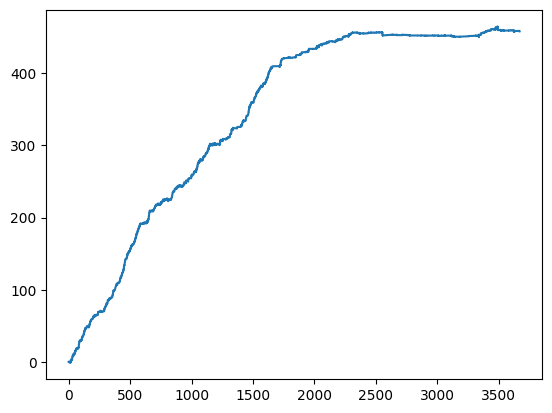

In [42]:
plt.plot(wheel_times, wheel_position)

In [44]:
wheel_position[:10]

array([ 0.00153398, -0.        , -0.00153398, -0.00306796, -0.00460194,
       -0.00613592, -0.0076699 , -0.00613592, -0.00460194, -0.00306796])

In [49]:
wheel_times[15500]

35.679931650035684

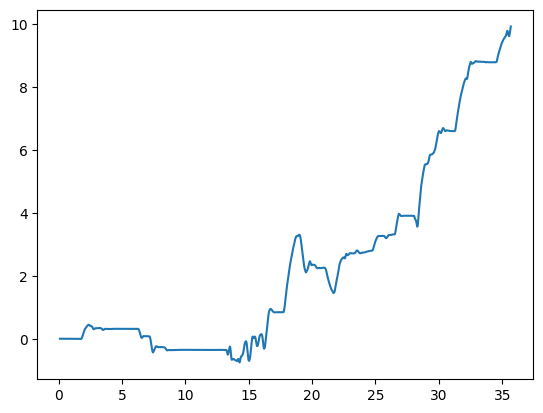

In [50]:
plt.plot(wheel_times[:15500], wheel_position[:15500])

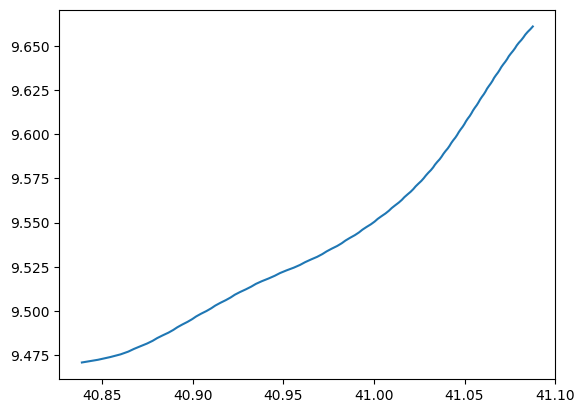

In [82]:
plt.plot(wheel_times[17725:17850], wheel_position[17725:17850])

In [66]:
trials["response_times"][:3], trials["stimOn_times"][:3]

(array([35.51233734, 41.07245696, 44.32386838]),
 array([22.21161195, 40.80565236, 43.51141509]))

In [81]:
wheel_times[17850]

41.08892403004109

In [10]:
video = one.load_dataset(eid, f'*leftCamera.raw.mp4', collection='raw_video_data')
times = one.load_dataset(eid, f'*leftCamera.times.npy', collection='alf')

100%|██████████| 22/22.0 [00:06<00:00,  3.37it/s]


In [11]:
video

PosixPath('/home/nuttidalab/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_016/2020-09-12/001/raw_video_data/_iblrig_leftCamera.raw.mp4')

In [12]:
times
times.shape

(218896,)

In [13]:
for eid in ephys_eid:
    df = pd.read_csv(f"data/frame_probs/{eid}_probs.csv")
    print(df.shape)

(208000, 4)
(218000, 4)
(284000, 4)
(228000, 4)
(254000, 4)
(274000, 4)
(360000, 4)
(316000, 4)
(196000, 4)
(324000, 4)
(280000, 4)
(230000, 4)
(296000, 4)
(310000, 4)
(374000, 4)
(376000, 4)
(310000, 4)
(300000, 4)
(272000, 4)
(248000, 4)
(234000, 4)
(288000, 4)
(224000, 4)
(348000, 4)
(250000, 4)
(356000, 4)
(264000, 4)
(340000, 4)
(240000, 4)
(364000, 4)
(304000, 4)
(210000, 4)
(248000, 4)
(238000, 4)
(238000, 4)
(196000, 4)
(300000, 4)
(384000, 4)
(392000, 4)
(288000, 4)
(256000, 4)
(270000, 4)
(430000, 4)
(238000, 4)
(394000, 4)
(304000, 4)
(356000, 4)
(298000, 4)
(278000, 4)
(392000, 4)
(272000, 4)
(244000, 4)
(228000, 4)


In [15]:
# glm_save_path = save_data_path(figure='fig_mtnn').joinpath('glm_hmm', 'k=4')
# download_glm_hmm()